# Microsoft Movie Studio Project 


![Image from web](https://tibs.ac.ke/uploads/course_cover_images/FILM_PRODUCTION_1.jpg) |
-

**Author :** Kennedy Owino

## Business Problem


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Understanding

In order to guide the decision-making process for Microsoft's new movie studio, it is imperative to conduct a comprehensive analysis of the current trends and successes in the film industry. One key aspect involves examining the types of films that have been performing exceptionally well at the box office. This entails studying recent blockbuster releases, assessing their genres, themes, and audience demographics, and identifying patterns that correlate with high financial returns. Additionally, it is essential to delve into the evolving preferences of global audiences, considering factors such as cultural diversity, emerging storytelling techniques, and the impact of digital platforms on viewership patterns.

Furthermore, a thorough examination of the competitive landscape is crucial to position Microsoft's movie studio strategically. This involves evaluating the strategies employed by other major players in the entertainment industry who have successfully ventured into original content creation. Analyzing the marketing and distribution approaches, as well as the critical and audience reception of recent blockbuster films from rival studios, will provide valuable insights into the dynamics of the market. The goal of this project is to distill these findings into actionable insights that will enable Microsoft's movie studio to make informed decisions about the type of films to produce, ensuring alignment with current market trends, audience preferences, and industry competition.


### Objectives of the Project


$i).$ Identify the types of films currently performing well at the box office
<br>
$ii).$ Identify genres with the highest production budget
<br>
$iii).$ Analyse trends in audience preferences and genres.
<br>
$iv).$ Estimate the best time to release a profitable movie.

## Data Understanding

The data utilized for this project was obtained from learn-co-curriculum Git repository.
<br>
The datasets include information from Box Office Mojo, IMDB, Rotten Tomatoes and TheMovieDB.org
<br>
This data included: movie titles, premiere dates, box office gross (domestic & foreign), ratings, reviews, and movie synopses. The data gives a overview of all theatre released movies up until 2019.




## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Datasets

movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

movie_info = pd.read_csv("rt.movie_info.tsv.gz", sep= '\t' )

bom_gross = pd.read_csv("bom.movie_gross.csv.gz")

tmdb = pd.read_csv("tmdb.movies.csv.gz", index_col= 0)

#importing moviebasics and rating from database

conn = sqlite3.connect("im.db")

query =( """

SELECT movie_id	,  mb.primary_title AS movie, mb.start_year AS year, mb.runtime_minutes, mb.genres, averagerating

FROM movie_basics AS mb
    JOIN movie_ratings AS mr
    USING(movie_id)
    WHERE mb.runtime_minutes >= 1.0; """)

movie_basics =  pd.read_sql(query, conn)



In [3]:
#clossing the database

conn.close()

In [4]:
#doing exploration for the tn.movie_budgets.csv.gz
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [5]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
#No mising data but the currency is an object instead of float.
#Convert the production_budget, domestic_gross, worldwide_gross from object to float type

movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross' ]] = (movie_budgets[['production_budget',
                                                                                             'domestic_gross', 
                                                                                             'worldwide_gross' ]]
                                                                               .applymap(lambda x: x.replace('$', '')))

In [7]:
#replace the commas then change the columns to float

movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross' ]] = (movie_budgets[['production_budget'
                                                                                             , 'domestic_gross', 
                                                                                             'worldwide_gross' ]]
                                                                              .applymap(lambda x: x.replace(',', ''))
                                                                              .astype(float))

In [8]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [9]:
movie_budgets.shape

(5782, 6)

In [10]:
#exloring the movie_basics retrived from the database

movie_basics.head()

,movie_id,movie,year,runtime_minutes,genres,averagerating
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1


In [11]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   movie            66236 non-null  object 
 2   year             66236 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    66236 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [12]:
#checking for the number of missing values

movie_basics.isna().sum()

movie_id             0
movie                0
year                 0
runtime_minutes      0
genres             516
averagerating        0
dtype: int64

In [13]:
movie_basics['genres'].value_counts()

genres
Drama                        10189
Documentary                   9149
Comedy                        4604
Comedy,Drama                  2451
Horror                        2232
                             ...  
Family,Horror,Romance            1
Action,History,Horror            1
Fantasy,History,Mystery          1
Adventure,Crime,Romance          1
Documentary,Family,Sci-Fi        1
Name: count, Length: 906, dtype: int64

In [14]:
#create category colled non-defined whose genres are not defined from out data base

movie_basics['genres'] = movie_basics['genres'].fillna('Non-defined')

In [15]:
#check if there are any more missing values

movie_basics.isna().sum()

movie_id           0
movie              0
year               0
runtime_minutes    0
genres             0
averagerating      0
dtype: int64

In [16]:
#Summary statistics
movie_basics.describe()

,year,runtime_minutes,averagerating
count,66236.000000,66236.000000,66236.000000
mean,2014.252687,94.654040,6.321925
std,2.600352,208.574111,1.458443
min,2010.000000,3.000000,1.000000
25%,2012.000000,81.000000,5.500000
50%,2014.000000,91.000000,6.500000
75%,2016.000000,104.000000,7.300000
max,2019.000000,51420.000000,10.000000


In the code cell below, a data manipulation operation has been performed by merging two DataFrames: `movie_budgets` and `movie_basics`. This merging process is aimed at combining information from these two datasets to create a comprehensive dataset that associates each movie produced within a specific period with its corresponding genre and budget.

The `movie_budgets` DataFrame contains information movies' production budget and domestic and worldwide gross. On the other hand, the `movie_basics` DataFrame includes details about the movies, including their genres. By merging these two DataFrames, we can create a new DataFrame that consolidates both financial and genre information for each movie produced within the the period ending 2022.

In [17]:
df = pd.merge(movie_budgets, movie_basics, on= 'movie')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2757 non-null   int64  
 1   release_date       2757 non-null   object 
 2   movie              2757 non-null   object 
 3   production_budget  2757 non-null   float64
 4   domestic_gross     2757 non-null   float64
 5   worldwide_gross    2757 non-null   float64
 6   movie_id           2757 non-null   object 
 7   year               2757 non-null   int64  
 8   runtime_minutes    2757 non-null   float64
 9   genres             2757 non-null   object 
 10  averagerating      2757 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 237.1+ KB


In [18]:
#checking for duplicates

df.duplicated().sum()

0

In [19]:
#drop the id colum

df.drop(columns= 'id', inplace= True)

#covert the release_date to pd datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,year,runtime_minutes,genres,averagerating
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,2011,93.0,Horror,6.1
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",6.0
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5


In [20]:
#number of unique genres

print('There are', df.genres.nunique(), 'unique generes in the data set!')

print('There are', df.movie.nunique(), 'movie titles in the dataset!')

There are 308 unique generes in the data set!
There are 2092 movie titles in the dataset!


Some movies had more than one genre movies have more that one genres. Therefore in this project split them  to have distinct genres.

In [21]:
#spliting genres on rows with multiple genres to distinct genres

df['genres'] = df['genres'].str.split(',')

In [22]:
#we explode the list of genres into new sepaeate rows

df_explode = df.explode('genres')


In [23]:
#print head of our new dataset

df_explode.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,year,runtime_minutes,genres,averagerating
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,2011,93.0,Horror,6.1
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Action,6.6
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Adventure,6.6
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Fantasy,6.6
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,2019,113.0,Action,6.0


Notice that some of the movies are duplicated.

That's okay for our analysis since we will be focussing on the genres that we shall
advise the microsoft to invest in for the new movie studio

In [24]:
#viwing the distinct genres the have on our dataset

print('There are', df_explode['genres'].nunique(), 'unique generes in the data set!')


There are 23 unique generes in the data set!


## Data Analysis 

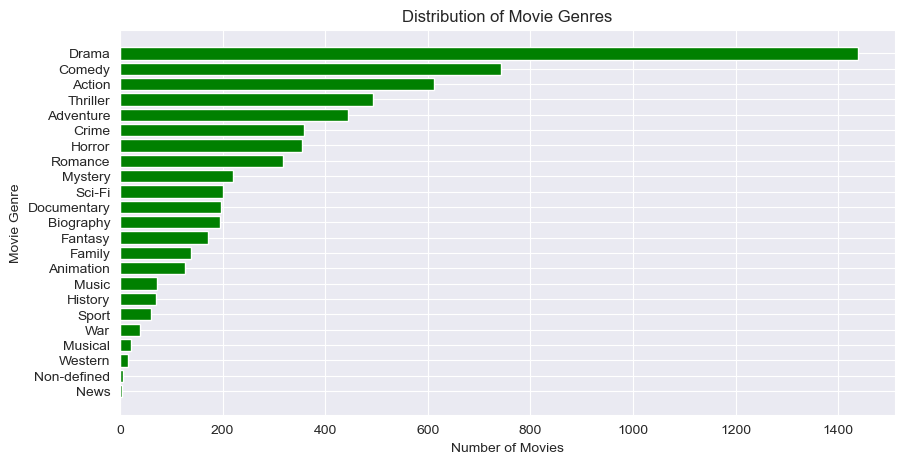

In [25]:
#setting the theme for our plots from seaborn library

sns.set_style('darkgrid')

#Visualizing the distribution of the genres

x = df_explode['genres'].value_counts().index.to_list()

y = df_explode['genres'].value_counts().to_list()

fig, ax = plt.subplots(figsize = (10, 5))

ax.barh(x[::-1], y[::-1], color =  'green')
ax.set_title('Distribution of Movie Genres')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Movie Genre');
#plt.xticks(rotation=45, ha='right');

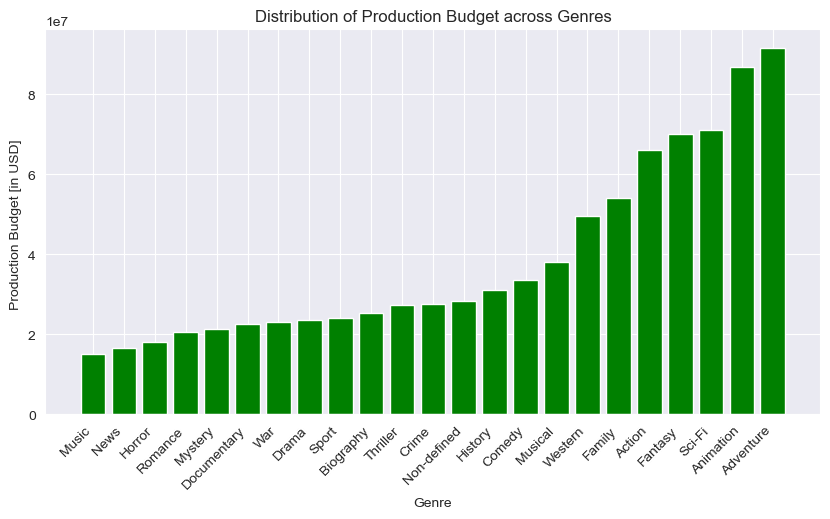

In [26]:
#most top 10 genres with highest production budget
#Visualizing the distribution of Movie production budget

genres_budget = df_explode.groupby('genres')['production_budget'].mean().sort_values()

plt.figure(figsize=(10,5))
plt.bar(genres_budget.index, genres_budget.values, color = 'green')

plt.ylabel('Production Budget [in USD] ')

plt.xlabel('Genre')

plt.title('Distribution of Production Budget across Genres')
plt.xticks(rotation=45, ha='right');



Adventure, Animation, and Sci-Fi emerge as the leading genres boasting the highest production budgets, reflecting substantial investments in these categories. 

Conversely, genres such as Music, News, and Horror occupy the lower spectrum of production budgets, signifying more conservative financial allocations for movies within these genres.

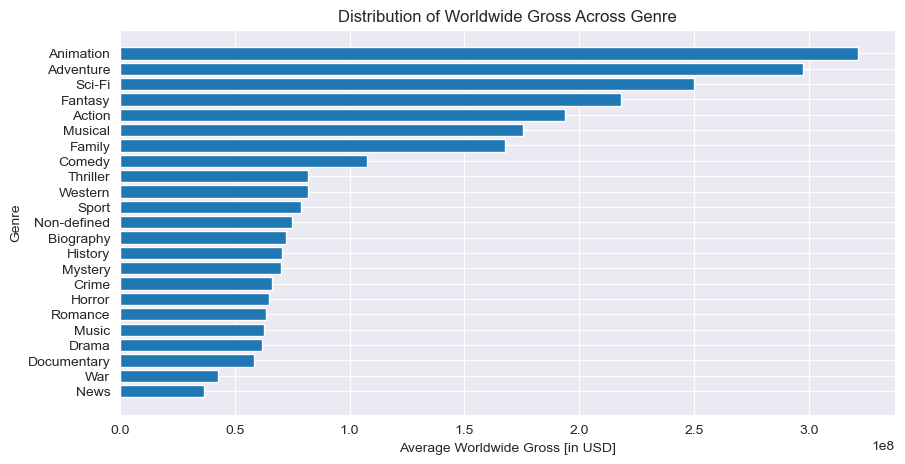

In [27]:
#top 5 genres with highess gross on average

worldwide_gross = df_explode.groupby('genres')['worldwide_gross'].mean().sort_values()

fig, ax1 = plt.subplots(figsize= (10,5))

ax1.barh(worldwide_gross.index, worldwide_gross.values)

ax1.set_title('Distribution of Worldwide Gross Across Genre')
ax1.set_xlabel('Average Worldwide Gross [in USD]')
ax1.set_ylabel('Genre');




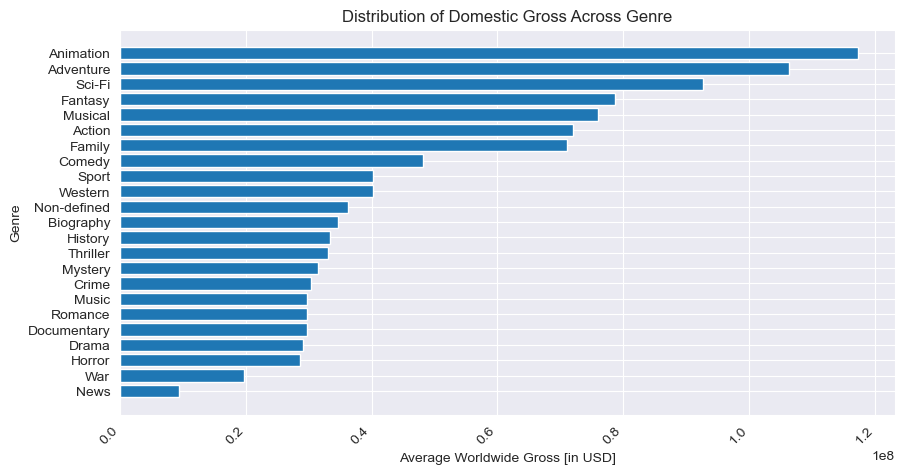

In [28]:
domestic_gross = df_explode.groupby('genres')['domestic_gross'].mean().sort_values()

fig, ax1 = plt.subplots(figsize= (10,5))

ax1.barh(domestic_gross.index, domestic_gross.values)

ax1.set_title('Distribution of Domestic Gross Across Genre')
ax1.set_xlabel('Average Worldwide Gross [in USD]')
ax1.set_ylabel('Genre')

plt.xticks(rotation = 45, ha = 'right');

Observing the plots, it becomes evident that Animation, Adventure, and Sci-Fi stand out with the highest domestic and worldwide gross figures. In contrast, genres like News, War, and Documentary appear to have the lowest worldwide and domestic gross, indicating comparatively lower financial performance in terms of box office revenue for movies within these genres.

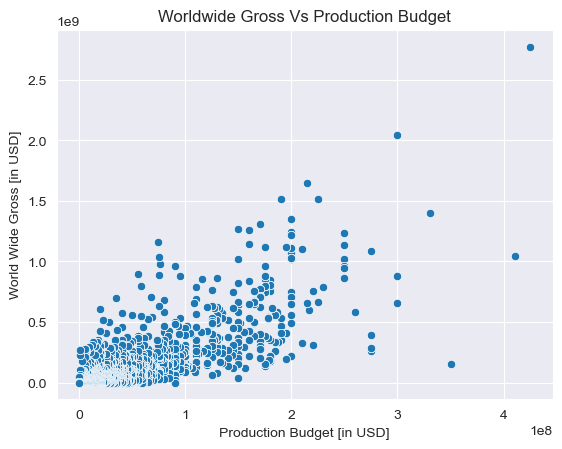

In [29]:
#budget vs worldwide gross
sns.scatterplot(data = df_explode, x = 'production_budget', y = 'worldwide_gross')
plt.xlabel('Production Budget [in USD]')
plt.ylabel('World Wide Gross [in USD]')
plt.title('Worldwide Gross Vs Production Budget');

In [30]:
np.corrcoef(df_explode['worldwide_gross'], df_explode['production_budget'])[0][1]

0.7812595578817854

In [31]:
#we create a new column called profit that takes worldwide gross minus the production budget

df_explode['worldwide_profit'] = df_explode['worldwide_gross'] - df_explode['production_budget']

df_explode.head(2)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,year,runtime_minutes,genres,averagerating,worldwide_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,2011,93.0,Horror,6.1,2.351345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Action,6.6,6.350639e+08


Text(0.5, 1.0, 'Top 5 Most Profitable Genres')

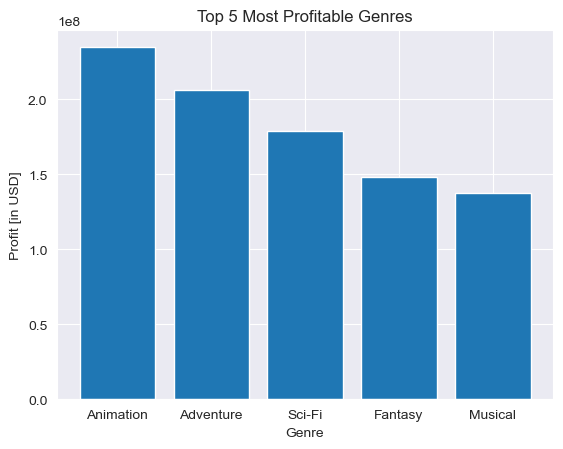

In [32]:
#Top 5 most profitable genres

profit = df_explode.groupby('genres')['worldwide_profit'].mean().sort_values(ascending = False)

fig, ax = plt.subplots()

ax.bar(profit.index[:5], profit.values[:5])

ax.set_xlabel('Genre')
ax.set_ylabel('Profit [in USD]')
ax.set_title('Top 5 Most Profitable Genres')

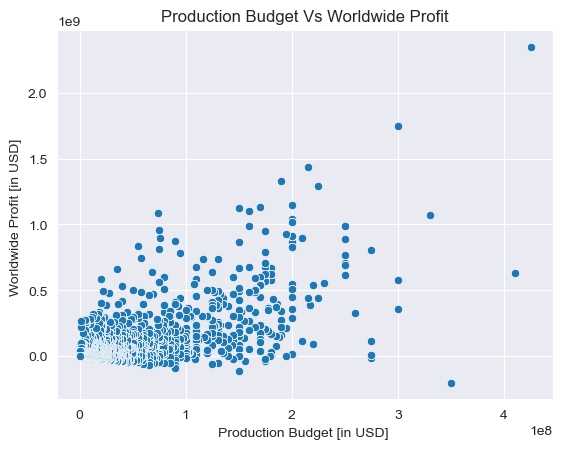

In [33]:
#Production_budget Vs Profit

sns.scatterplot(data = df_explode, x = 'production_budget', y = 'worldwide_profit')
plt.title('Production Budget Vs Worldwide Profit')
plt.xlabel('Production Budget [in USD] ')
plt.ylabel('Worldwide Profit [in USD] ');

In [35]:
correlation_budget = np.corrcoef(df_explode['production_budget'], df_explode['worldwide_profit'])[0][1]

print(f"The correlation cofficient between a movie's production budget and profit is {round(correlation_budget, 3)}")

The correlation cofficient between a movie's production budget and profit is 0.657


#### Does Rating has an impact on the profit?


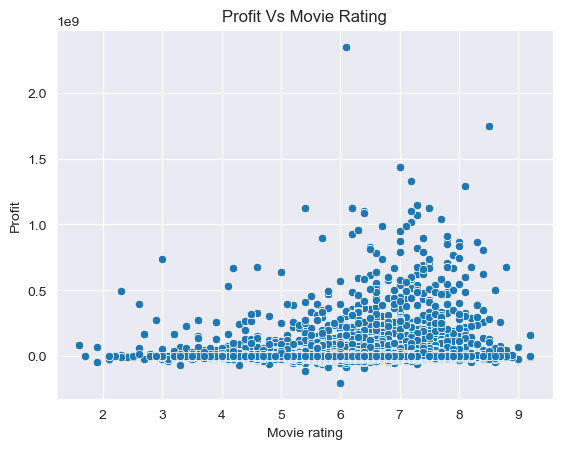

In [36]:
#rating Vs worlwide_Gross

sns.scatterplot(data = df_explode, x='averagerating', y= 'worldwide_profit')
plt.title('Profit Vs Movie Rating')
plt.xlabel('Movie rating')
plt.ylabel('Profit');


In [37]:
correlation = np.corrcoef(df_explode['averagerating'], df_explode['worldwide_profit'])[0][1]

print(f'The correlation cofficient between a movie rating and profit is {round(correlation, 3)}')

The correlation cofficient between a movie rating and profit is 0.215


## Does runtime have an impact on profit

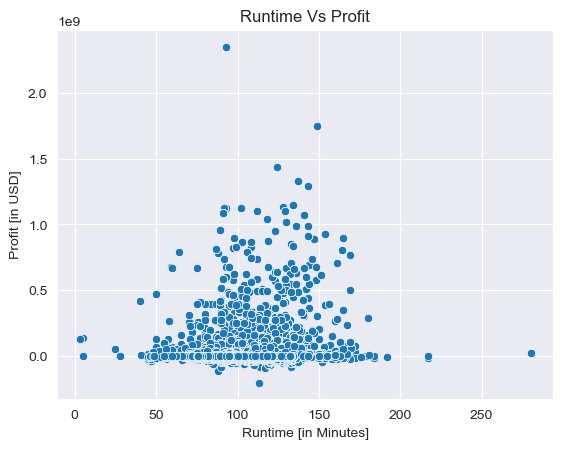

In [38]:
sns.scatterplot(data = df_explode, x = 'runtime_minutes', y = 'worldwide_profit')
plt.title('Runtime Vs Profit')
plt.xlabel('Runtime [in Minutes]')
plt.ylabel('Profit [in USD]');


In [39]:
correlation_runtime = np.corrcoef(df_explode['runtime_minutes'], df_explode['worldwide_profit'])[0][1]

print(f'The correlation cofficient between a movie rating and profit is {round(correlation_runtime, 3)}')

The correlation cofficient between a movie rating and profit is 0.214


In [40]:
#creating a month column

df_explode['release_month'] = df_explode['release_date'].dt.strftime('%B')

df_explode.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,year,runtime_minutes,genres,averagerating,worldwide_profit,release_month
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,2011,93.0,Horror,6.1,2.351345e+09,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Action,6.6,6.350639e+08,May
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Adventure,6.6,6.350639e+08,May
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,2011,136.0,Fantasy,6.6,6.350639e+08,May
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,2019,113.0,Action,6.0,-2.002376e+08,June


In [41]:
# Converted 'release_month' column to Categorical with the correct order

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_explode['release_month'] = df_explode['release_month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True))

profit_by_release = df_explode.groupby('release_month')['worldwide_profit'].mean().sort_values()



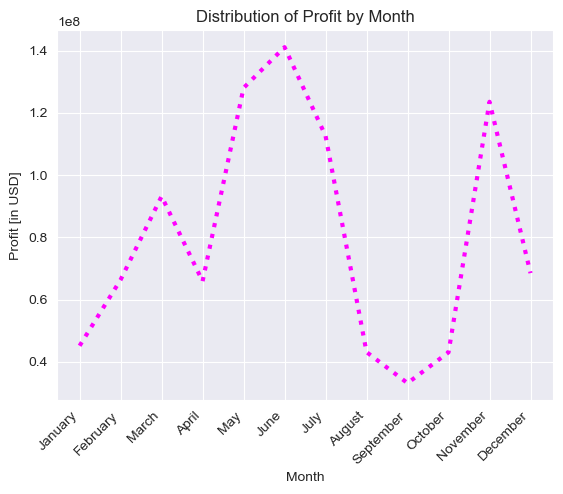

In [42]:
sns.lineplot(x = profit_by_release.index, y = profit_by_release.values, linestyle='dotted', color='magenta', linewidth=3)
plt.xlabel('Month')
plt.ylabel('Profit [in USD]')
plt.title('Distribution of Profit by Month')

plt.xticks(rotation = 45, ha = 'right');



Most profitable movies are produced between April and July

## Conclusions


From the EDA we have perfomed on our `df_explode` we make the following conclusions:

$i.$ The greatest production budgets are seen in the Animation, Adventure, and Sci-Fi genres, indicating significant financial commitments in the creation of these cinematic experiences. Music, News, and Horror, on the other hand, are at the lower end of the production budget spectrum, indicating more modest budgetary commitments for films in these categories.


$ii.$ Animation, Adventure, Sci-Fi, Fantasy, and Musical genres emerge as the top five best-performing genres, exhibiting the highest profit margins. 

$iii.$ The majority of movies have a runtime averaging around 94.65 minutes. Additionally, the correlation coefficient of 0.214 between runtime and profit suggests there is limited evidence supporting the notion that an extended runtime significantly contributes to higher profit margins.

$iv.$ A correlation of 0.215 between movie ratings and profit implies that there is only a modest relationship between the two variables. This finding suggests that a movie's rating has limited influence on its profit margins. While viewer ratings can impact a movie's reception, other factors likely play a more substantial role in determining its financial success.

$v.$ Movies released between April and July exhibit higher average profit margins compared to those released during other months of the year. This temporal trend suggests that there may be favorable conditions or market dynamics during this period that contribute to increased profitability for movies.

## Recommendation

There are may other factors that we might come to play while considering production of a succesful and profitable movie, such as role played by directors, actors et al.
From EDA performed in this project, I would recommend the following:

$1.$ Microsoft stands to gain substantial returns on investment by strategically entering the Animation, Sci-Fi, and Adventure genres. These genres have consistently proven to be the most popular, demonstrating a robust track record of higher profitability in the film industry.

$2.$ For optimal financial performance, it is advisable for Microsoft's movie studio to target a runtime range of 90 to 110 minutes. This recommendation is based on the observed trend that there is limited empirical support for the notion that extended runtimes significantly contribute to higher profit margins.

$3.$ To maximize profitability, Microsoft should plan movie releases between April and August. This temporal window has exhibited a historical pattern of yielding the highest average profits for movies. Aligning movie releases with this timeframe could capitalize on favorable market dynamics or consumer behaviors during these months.

$4.$ Further research should be done on the role played by actors, directors on the profitability of the movie.Microsoft stands to gain substantial returns on investment by strategically entering the Animation, Sci-Fi, and Adventure genres. These genres have consistently proven to be the most popular, demonstrating a robust track record of higher profitability in the film industry.